# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data munging

In [2]:
df1 = pd.read_csv('blabla/resultados-del-test-febrero-octubre-2018.csv', sep=';')

In [3]:
df2 = pd.read_csv('blabla/resultados-del-test.csv')

df2.head()

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13
0,2019-06-14,09:09:00,27,Mujer,Constitución,A,A,A,B,A,B,C,C,B,C,B,C,C
1,2019-06-13,23:20:00,17,Mujer,Otro,A,B,B,B,B,C,C,B,B,C,B,C,C
2,2019-06-13,16:33:00,15,Mujer,Recoleta,B,B,C,B,C,B,B,A,A,A,A,A,A
3,2019-06-13,16:10:00,20,Mujer,Barracas,B,C,C,C,C,C,C,C,C,C,B,C,C
4,2019-06-13,14:29:00,39,Hombre,Almagro,B,C,B,B,C,C,B,C,B,C,C,B,C


In [4]:
# Igualar los nombres de columnas de ambos datasets
df2 = df2.rename(columns = {'fecha':'FECHA',
                            'hora':'HORA',
                            'edad':'EDAD', 
                            'genero':'GENERO',
                            'barrio':'BARRIO',
                            'pregunta_1':'PREG_1',
                            'pregunta_2':'PREG_2',
                            'pregunta_3':'PREG_3',
                            'pregunta_4':'PREG_4',
                            'pregunta_5':'PREG_5',
                            'pregunta_6':'PREG_6',
                            'pregunta_7':'PREG_7',
                            'pregunta_8':'PREG_8',
                            'pregunta_9':'PREG_9',
                            'pregunta_10':'PREG_10',
                            'pregunta_11':'PREG_11',
                            'pregunta_12':'PREG_12',
                            'pregunta_13':'PREG_13',
                           })



In [5]:
# Unir ambos datasets 

df = df1.append(df2, ignore_index=True)

df.head()

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,PREG_11,PREG_12,PREG_13
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B,NaN,NaN,NaN
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B,NaN,NaN,NaN
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C,NaN,NaN,NaN
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B,NaN,NaN,NaN
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C,NaN,NaN,NaN


In [6]:
# Igualar los datos

df.GENERO.value_counts() # Hay valores en mayuscula y minúscula


MUJER     8486
Mujer     4736
HOMBRE    3107
Hombre     912
OTRO        50
Otro        28
Name: GENERO, dtype: int64

In [7]:
# Pasamos todo a formato titulo (primera letra mayuscula)

df.GENERO = df.GENERO.str.title()
df.BARRIO = df.BARRIO.str.title()


In [ ]:
df = df.resample('1M').sum() # Agrupar datos por mes

In [9]:
df['PREG_1'].map({'C': 0, 'B':1, 'A':2})
df['PREG_2'].map({'C': 0, 'B':1, 'A':2})
df['PREG_17'] = df['PREG_1'] + df1['PREG_2']

In [10]:
df['DATETIME'] = pd.to_datetime(df['FECHA'] + ' ' + df['HORA'])

df.DATETIME
df = df.set_index('DATETIME')

In [15]:
df = pd.get_dummies(df.BARRIO) # Hacer una columna por barrio

In [8]:
df.EDAD.value_counts()
# ver que hacer con el <18
# sns.histplot(df.EDAD, bins=10)

<18    890
25     705
23     639
21     639
22     614
      ... 
89       1
79       1
76       1
97       1
76       1
Name: EDAD, Length: 133, dtype: int64

In [11]:
df.head()

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,PREG_11,PREG_12,PREG_13,PREG_17
DATETIME,,,,,,,,,,,,,,,,,,,
2017-02-13 23:41:00,13/02/2017,23:41,28,Hombre,Palermo,B,B,B,B,B,B,B,B,B,B,NaN,NaN,NaN,BB
2017-02-13 20:09:00,13/02/2017,20:09,23,Mujer,Balvanera,B,B,B,B,B,B,B,B,B,B,NaN,NaN,NaN,BB
2017-02-13 20:07:00,13/02/2017,20:07,22,Mujer,Balvanera,A,A,A,A,A,A,A,A,B,C,NaN,NaN,NaN,AA
2017-02-13 20:04:00,13/02/2017,20:04,34,Mujer,Villa Pueyrredon,C,C,B,C,B,C,C,C,C,B,NaN,NaN,NaN,CC
2017-02-13 19:34:00,13/02/2017,19:34,31,Mujer,Caballito,C,C,C,C,C,C,C,C,C,C,NaN,NaN,NaN,CC


# Plotting

/Users/lambda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENERO', ylabel='count'>

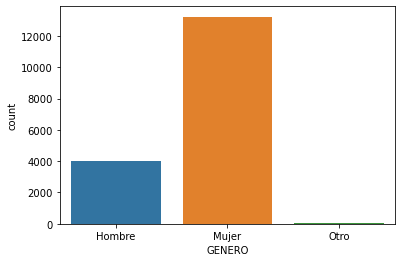

In [12]:
sns.countplot(df.GENERO)

In [14]:
barrios = df.BARRIO.unique()
print(barrios)

['Palermo' 'Balvanera' 'Villa Pueyrredon' 'Caballito' 'Boedo' 'Mataderos'
 'Recoleta' 'Monte Castro' 'Belgrano' 'Barracas' 'Otro' 'Villa Urquiza'
 'Villa Crespo' 'Liniers' 'Coghlan' 'Almagro' 'Agronomia' 'San Telmo'
 'Villa Luro' 'Constitucion' 'Montserrat' 'Parque Chas' 'Chacarita'
 'Villa Devoto' 'Flores' 'Villa Riachuelo' 'Parque Patricios'
 'Villa Soldati' 'Nuñez' 'Retiro' 'Nueva Pompeya' 'Villa Del Parque'
 'San Nicolas' 'Velez Sarsfield' 'Puerto Madero' 'La Boca'
 'Parque Chacabuco' 'San Cristobal' 'Villa Real' 'Parque Avellaneda'
 'Saavedra' 'Villa Lugano' 'Colegiales' 'Versalles' 'Floresta'
 'La Paternal' 'Villa General Mitre' 'Villa Ortuzar' 'None' 'Constitución'
 'Villa Pueyrredón' 'San Cristóbal' 'San Nicolás' 'Villa Ortúzar'
 'Vélez Sarsfield']


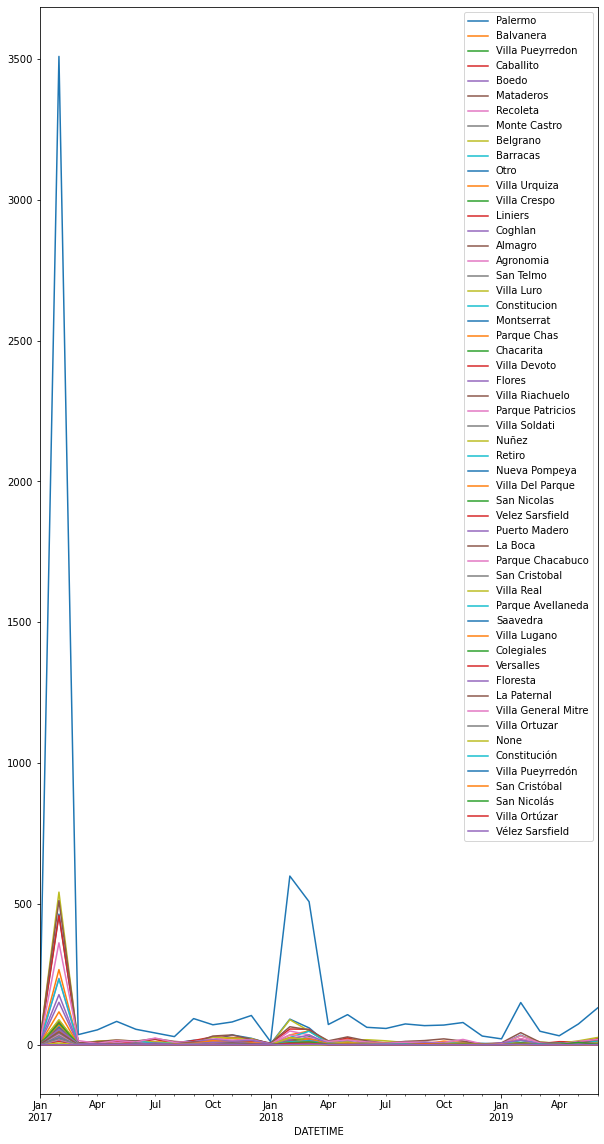

In [30]:
fig = plt.figure(figsize=(10,20))
for barrio in barrios:
    df[barrio].plot()
plt.legend()
plt.show() # Super incomodo este grafico, ver si se puede mapear